In [8]:
import numpy as np
import pandas as pd
from statsmodels.stats.power import tt_ind_solve_power
import matplotlib.pyplot as plt

In [75]:
# user choice
daily_ss_per_group = 1000
baseline_conversion_rate = 0.2
abs_or_rel_effect = 'relative' # or 'absolute'

# fixed parameters
power = 0.8
confidence_level = 0.95
max_lim_days = 90

In [76]:
def compute_cumulative_ss(daily_ss_per_group: int, max_lim_days: int) -> list:
    return np.cumsum([daily_ss_per_group] * max_lim_days)

def compute_absolute_effect_size(l_ss_per_group: list, alpha: float, power: float) -> list:
    return [tt_ind_solve_power(nobs1 = ss,
                               alpha = alpha,
                               power = power,
                               alternative = 'two-sided') for ss in l_ss_per_group]

def compute_relative_effect_size(l_absolute_effect_size: list, baseline_conversion_rate: float) -> list:
    return [x / baseline_conversion_rate for x in l_absolute_effect_size]

def plot_cumulative_mde(l_days: list, 
                        l_absolute_effect_size: list, 
                        baseline_conversion_rate: float,
                        abs_or_rel_effect='absolute'):
    
    if abs_or_rel_effect=='relative':
        l_effect_size = compute_relative_effect_size(l_absolute_effect_size, baseline_conversion_rate)
    else:
        l_effect_size = l_absolute_effect_size
        
    plt.plot(l_days, l_effect_size)
    plt.title(f'''What is the Minimum Detectable Effect I can expect 
                  after X days and a baseline conversion rate 
                  of {round(baseline_conversion_rate * 100)}%?''')
    plt.xlabel("Days")
    if abs_or_rel_effect=='relative':
        plt.ylabel("Relative effect size")
    else:
        plt.ylabel("Absolute effect size")
        
    l_x_y = []
    for x, y in zip(l_days, l_effect_size):
        l_x_y.append((x, y))
    coordinates = [l_x_y[i] for i in np.arange(0, len(l_days), 10)]
    
    for couple in coordinates:
        label = str(round(couple[1] * 100, 1)) + '%'
        plt.annotate(label,
                     couple,
                     textcoords='offset points',
                     xytext=(0, 2),
                     ha='left')
    plt.show()

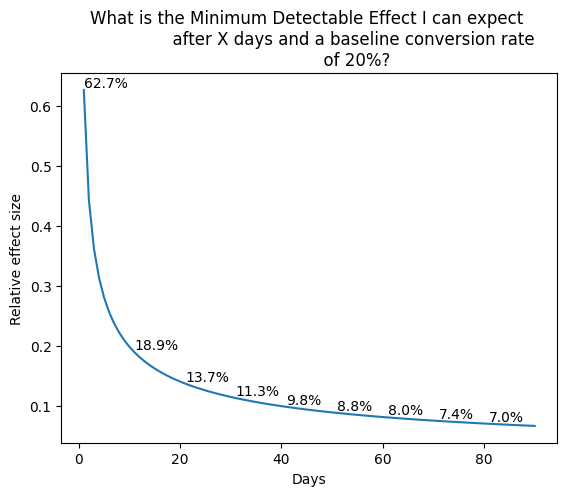

In [77]:
l_days = list(range(1, max_lim_days + 1))
l_ss_per_group = compute_cumulative_ss(daily_ss_per_group, max_lim_days)
# effect_size = uplift divided by the standard deviation 
l_absolute_effect_size = compute_absolute_effect_size(l_ss_per_group=l_ss_per_group, 
                                                      alpha=1-confidence_level, 
                                                      power=power)
plot_cumulative_mde(l_days, l_absolute_effect_size, baseline_conversion_rate, abs_or_rel_effect)